In [10]:
# Ahmet Kemal Yetkin
# 504201506

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import sys

## 1. Bellman-Ford shortest path algorithm

#### 1.1 Explain the key steps of Bellman-Ford algorithm (one-by-one).

The Bellman Ford algorithm is used to calculate the shortest path from i to j on a graph. There are some key steps of this algorithm:
- First, all nodes distances are adjusted to infinity. A list is created for backtracking the nodes. (Initializing Process)
- The algorithm does not use any priority queue to greedily select the closest vertex that has not yet been processed as Dijsktra's Algorithm. It checks all nodes and their edges |V|-1 times whereas |V| is the node count.
- The Bellman-Ford Algorithm runs in O(|V|x|E|) time. |E| is the edges count.
- The algorithm is able to work for negative edge weights. Since there is a relaxation process, we can find shorter paths in the graph with negative edge weights.

#### 1.2 Write a function called BellmanFordAlgo that takes (i) A and (2) a starting node ID as inputs, and outputs an array as in Graph Theory Blink 5.4a, where each row represents a node in the graph G and comprising three columns (nodes, shortest distance from source input node, previous node).


In [11]:
def BellmanFordAlgo(adjMat, src):
    graph = {}
    for i in range(len(adjMat)):
        for j in range (len(adjMat[1])):
            if(adjMat[i][j] != 0):
                graph[i,j] = adjMat[i][j]
    # print(graph)
    
    nodes = []
    for key in graph:
        for element in key:
            nodes.append(element)

    nodes = list(set(nodes))

    prev_node = []
    distance = []

    for i in range(len(nodes)):
        distance.append(np.inf)
        prev_node.append('null')

    distance[src] = 0

    for times in range(len(nodes)-1):
        for edge in graph:
            if(distance[edge[1]] > distance[edge[0]] + graph[edge]):
                distance[edge[1]] = distance[edge[0]] + graph[edge]
                prev_node[edge[1]] = edge[0]

    output = []
    for i in range(len(nodes)):
        output.append([nodes[i], distance[i], prev_node[i]])
 
    return output

#### 1.3 Run your function in the Jupyter Notebook on the input adjacency matrix A (see Fig. fig:1) and display the output array. You can find the data inside ‘Exercise 1 data’ folder.

In [12]:
adj_mat = scipy.io.loadmat('Exercise_1_data/adjacencyMatrix.mat')
source_node = 1
print(32*"*","BellmanFord Output", 32*"*")
print()
print(BellmanFordAlgo(adj_mat['A'],source_node))


******************************** BellmanFord Output ********************************

[[0, inf, 'null'], [1, 0, 'null'], [2, inf, 'null'], [3, 4, 1], [4, 7, 3], [5, 5, 3]]







## 2. Global efficiency, diffusion efficiency and graph morphospace

#### 2.1 Write a function globalEfficiency, which inputs a graph adjacency matrix A and outputs the global efficiency value.

In [13]:
def globalEfficiency(adjMat_default, useThreshold = False, th_value = 0.0):
    adjMat = adjMat_default.copy()
    if (useThreshold):
        #th degerinden kucuk olanlari sifirliyor (true ise esittir sifir)
        adjMat[adjMat <= th_value] = 0

    sum_of_paths = 0.0
    for i in range(len(adjMat)):
        shortest_path = BellmanFordAlgo(adjMat,i)
        for path in shortest_path:
            if(path[0] != i  and path[1] != np.inf):
                sum_of_paths += 1/path[1]

    if(sum_of_paths != 0):
        harmonic_mean = (len(adjMat) * (len(adjMat)-1)) * ( 1 / sum_of_paths)
        if harmonic_mean != 0: 
            return (1/harmonic_mean)
        else: return 0
    else: return 0



print("Global Efficiency  ---->>>>", globalEfficiency(adj_mat['A']))

Global Efficiency  ---->>>> 0.1492063492063492


#### 2.2 Write a function diffusionEfficiency, which inputs a graph adjacency matrix A and outputs the diffusion efficiency value.

In [14]:
def diffisionEfficiency(adjMat_default, useThreshold = False, th_value = 0.0):
    adjMat = adjMat_default.copy()
    if (useThreshold):
        #th degerinden kucuk olanlari sifirliyor (true ise esittir sifir)
        adjMat[adjMat <= th_value] = 0

    #First step defining the U matrix --> U = W x (1/S)
    S = np.zeros((len(adjMat),len(adjMat[1])))

    for i in range(len(adjMat)):
        S[i][i] = np.sum(adjMat[i,:])
    U = np.dot(adjMat, np.linalg.inv(S))
    sum_of_Xij = 0
    
    for i in range(len(adjMat)):
        for j in range(len(adjMat[1])):
            if(i != j):
                Uj = U.copy()
                Uj[j,:] = 0
                one = np.eye(len(adjMat))
                sub = one - Uj
                
                try:
                    inv_sub = np.linalg.inv(sub)
                except:
                    inv_sub = np.zeros((len(adjMat),len(adjMat[1])))
                    
                
                Xij = np.sum(inv_sub[:,i])

                if(Xij!=0):
                    sum_of_Xij += 1/Xij
    diffE = (1 / (len(adjMat)*(len(adjMat)-1))) * sum_of_Xij

    return diffE

print("Diffision Efficiency  ---->>>>", diffisionEfficiency(adj_mat['A']))

Diffision Efficiency  ---->>>> 0.28354152288934886


#### 2.3 Create a scatter plot where x-axis represents threshold value α ∈ [0 : 0.1 : 0.9] (0.1 denotes the threshold step size) and the y-axis represents the global efficiency Eglob of brain graph adjacency matrices ‘Exercise 2 data/ brainGraph1.mat’ and ‘Exercise 2 data/ brainGraph2.mat’ (Fig. fig:2). Bythresholding each adjacency matrix at different threshold values α ∈ [0 : 0.1 : 0.9], examine how its global and diffusion efficiencies change. Use two different colors to compare the change in global efficiency across both brain graphs.

In [15]:
brain_mat_1 = scipy.io.loadmat('Exercise_2_data/brainGraph1.mat')
brain_mat_2 = scipy.io.loadmat('Exercise_2_data/brainGraph2.mat')

In [16]:
def plotData_globalEfficiency(adjMat, th_min, th_max, th_stepsize):
    x_axis = []
    y_axis = []
    for th_value in np.arange(th_min, th_max, th_stepsize):
        x_axis.append(th_value)
        y_axis.append(globalEfficiency(adjMat, useThreshold=True, th_value=th_value))
    return x_axis,y_axis

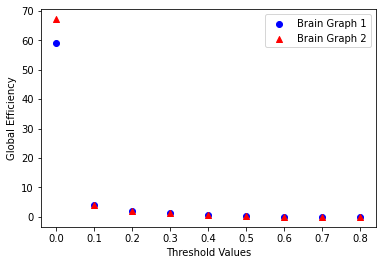

In [17]:
glob_thValues_1, globalEfficiency_1 = plotData_globalEfficiency(brain_mat_1['W'], 0.0, 0.9, 0.1)
glob_thValues_2, globalEfficiency_2 = plotData_globalEfficiency(brain_mat_2['W'], 0.0, 0.9, 0.1)

fig, axes = plt.subplots()
axes.scatter(glob_thValues_1, globalEfficiency_1, color='blue', marker='o', label = "Brain Graph 1")
axes.scatter(glob_thValues_2, globalEfficiency_2, color='red', marker='^', label = "Brain Graph 2")

plt.xlabel("Threshold Values")
plt.ylabel("Global Efficiency")
plt.legend()
plt.show()

#### 2.4 In a second figure, plot the diffusion efficiency Ediff of both matrices against α.

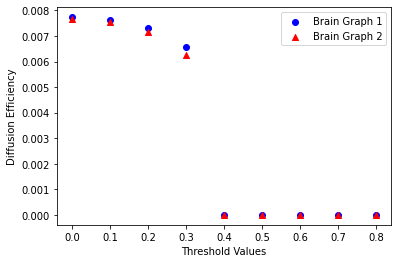

In [18]:
def plotData_diffusionEfficiency(adjMat, th_min, th_max, th_stepsize):
    x_axis = []
    y_axis = []
    for th_value in np.arange(th_min, th_max, th_stepsize):
        x_axis.append(th_value)
        y_axis.append(diffisionEfficiency(adjMat, useThreshold=True, th_value=th_value))
    return x_axis,y_axis


diff_thValues_1, diffusionEfficiency_1 = plotData_diffusionEfficiency(brain_mat_1['W'], 0.0, 0.9, 0.1)
diff_thValues_2, diffusionEfficiency_2 = plotData_diffusionEfficiency(brain_mat_2['W'], 0.0, 0.9, 0.1)

fig, axes = plt.subplots()
axes.scatter(diff_thValues_1, diffusionEfficiency_1,  color='blue', marker='o', label = "Brain Graph 1")
axes.scatter(diff_thValues_2, diffusionEfficiency_2, color='red', marker='^', label = "Brain Graph 2")

plt.xlabel("Threshold Values")
plt.ylabel("Diffusion Efficiency")
plt.legend()
plt.show()

#### 2.5 What conclusions can you derive from previous plots? Compare diffusion and global efficiencies within a single graph and across both graphs.

We can observe that there is a huge dramatic decrease for both plots as the threshold value increases. The diffusion efficiency starts to decrease slower and when threshold is 0.4, the values becomes 0. By contrast, the global efficiency starts to decrease with huge gap and it goes to 0 slowly. 

It can be observed that *global efficiency* of Brain Graph 2 is higher than Brain Graph 1 before a decrease happens at 0.1 . Therefore, it can be said that Brain Graph 2 has shorter paths than Brain Graph 1. 

It can be observed that *diffusion efficiency* of Brain Graph 2 is slightly lower than Brain Graph 1. This difference is increases with the threshold value until the 0.4 . Diffusion efficiency searches for an answer to the "*How long does it take to discover shortest path?*" question. Looking at the graph starting from this question, we can see that there is no edge for the shortest path at values higher than 0.4 . It means values larger than 0.4 become less important for diffusion efficiency since there is no edge for the shortest path.



#### 2.6 Plot a morphospace [1] for the set of thresholded brain graphs at α ∈ [0 : 0.1 : 0.9], where the x-axis denotes Edif f and y-axis denotes Eglob. Use two different colors to compare the two thresholded graph sets derived from each brain graph, respectively.

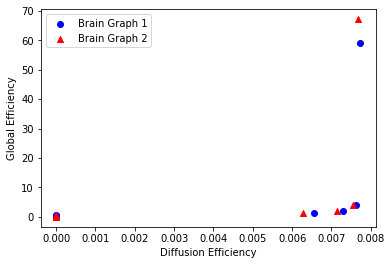

In [19]:
fig, axes = plt.subplots()
axes.scatter(diffusionEfficiency_1, globalEfficiency_1, color='blue', marker='o', label = "Brain Graph 1")
axes.scatter(diffusionEfficiency_2, globalEfficiency_2, color='red', marker='^', label = "Brain Graph 2")

plt.xlabel("Diffusion Efficiency")
plt.ylabel("Global Efficiency")
plt.legend()
plt.show()

#### 2.7 Discuss the information flow efficiency for both brain graphs based on your morphospace plot.

It is possible to draw some conclusions by looking at the graph above. We can see that when the Diffusion Efficiency increases, the Global Efficiency also increases. It can be seen that while the diffusion efficiency is increasing, the global efficiency is also increasing in the right proportion. However, at some point, the global efficiency reaches its maximum value. Also, it can be seen that there are some values around the zero.

The graph can be examined in some parts. We can examine the first part as the highest global and diffusion efficiency and the second part is  low global and diffusion efficiency. The first part is more likely to be star-like or modular graph model compared to the others. The second part is more likely to be highly connected node structures model with many peripheral nodes. The last part which is arround zero, it is the similar to the chain or ring model.

## 3. Graph self-diffusion for image segmentation

#### 3.1 Write a function called selfDiffuse that takes (i) a weighted graph adjacency matrix (i.e., similarity matrix) W and outputs the diffused matrix W* (check algorithm fig:3.). Make sure that your algorithm automatically sets the optimal number of diffusion iterations t* as explained in the paper.

In [59]:
loading = "|/-\\"

def selfDiffuse(adjMat, threshold=False):
    W = adjMat.copy()
    W_star_list = []
    # Initializing the strength matrix D
    D = np.zeros((len(adjMat),len(adjMat[1])))

    for i in range(len(adjMat)):
        D[i][i] = np.sum(adjMat[i,:])
        
    inv_D = np.linalg.inv(D)
    P = np.dot(inv_D,W)
    w, v = np.linalg.eig(P)
    w_sort = np.sort(w)[::-1]
    l2 = w_sort[1]
    n = len(adjMat)
    
    # Since they do not specify ε value, I used the epsilon as
    # a small positive constant with the value that I specified.
    # It is also used the same in the cluster() func below.
    e = 1e-10
    dof_P = np.trace(P)
    I = np.eye(n)
    t_star = ( np.log( e / ( (n-dof_P) * np.linalg.norm(W - np.dot(W,P) - I) ) ) / np.log(l2-0.05))
    t_star = int(np.ceil(t_star))
    print("t* = ", t_star)
    W_star_dict = {}
    if threshold == True:
        vary_thresholds = np.linspace(1, 2*t_star, 5).astype(int)
        for i in range(vary_thresholds[4]+1):
            sys.stdout.write("\r" + loading[i % len(loading)])
            sys.stdout.flush()
            if i == 0:
                W_t = np.dot(W,P) + I
                continue
            W_t = np.dot(W_t, P) + I
            W_star = np.dot(W_t,inv_D)

            if i in vary_thresholds:
                W_star_dict[i] = W_star.copy()
        return W_star_dict
    
    else:
        # Performing smoothing for t* steps:
        for i in range(t_star):
            sys.stdout.write("\r" + loading[i % len(loading)])
            sys.stdout.flush()
            if i == 0:
                W_t = np.dot(W,P) + I
                continue
            W_t = np.dot(W_t, P) + I
            W_star = np.dot(W_t,inv_D)
            # Self-normalization
            W_star_list.append(W_star.copy())
    
    return W_star_list

#### 3.2 Run selfDiffuse on both brain graph adjacency matrices ‘Exercise 2 data/ brainGraph1.mat’ and ‘Exercise 2 data/ brainGraph2.mat’. For each brain graph, visualize both original and diffused matrices.

Brain Graph 1:
t* =  87
-

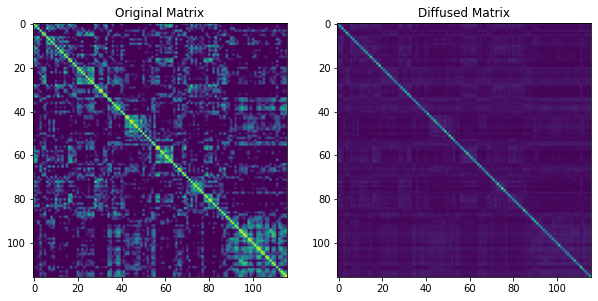


-----------------------------------------------------------------------------------
Brain Graph 2:
t* =  91
-

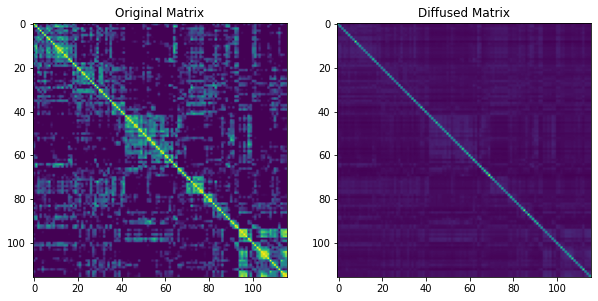

In [21]:
print("Brain Graph 1:")
fig, ax = plt.subplots(ncols=2, figsize=(10, 12))
ax[0].imshow(brain_mat_1['W'])
ax[0].title.set_text("Original Matrix")
ax[1].imshow(selfDiffuse(brain_mat_1['W'])[-1])
ax[1].title.set_text("Diffused Matrix")
plt.show()
print()
print(83 * "-")
print("Brain Graph 2:")
fig, ax = plt.subplots(ncols=2, figsize=(10, 12))
ax[0].imshow(brain_mat_2['W'])
ax[0].title.set_text("Original Matrix")
ax[1].imshow(selfDiffuse(brain_mat_2['W'])[-1])
ax[1].title.set_text("Diffused Matrix")
plt.show()

#### 3.3 Given the 2 images taken from the Berkeley Segmentation Data Setc, generate the segmentation maps of each image using the Normalized Cut Python code https://github.com/marktao99/python/blob/master/CVP/ samples/ncut.py. Display each original image and its corresponding output segmentation map.

In [82]:
#reference: https://github.com/marktao99/python/blob/master/CVP/

from PIL import Image
from pylab import *
from numpy import *
from scipy.cluster.vq import *


def cluster(S,k,ndim):
    """ Spectral clustering from a similarity matrix."""
    
    # check for symmetry
    if sum(abs(S-S.T)) > 1e-10:
        print ('not symmetric')
    
    # create Laplacian matrix
    rowsum = sum(abs(S),axis=0)
    D = diag(1 / sqrt(rowsum + 1e-6))
    L = dot(D,dot(S,D))
    
    # compute eigenvectors of L
    U,sigma,V = linalg.svd(L,full_matrices=False)
    
    # create feature vector from ndim first eigenvectors
    # by stacking eigenvectors as columns
    features = array(V[:ndim]).T

    # k-means
    features = whiten(features)
    centroids,distortion = kmeans(features,k)
    code,distance = vq(features,centroids)
        
    return code,V


def ncut_graph_matrix(im,sigma_d=1e2,sigma_g=1e-2):
    """ Create matrix for normalized cut. The parameters are 
        the weights for pixel distance and pixel similarity. """
    
    m,n = im.shape[:2] 
    N = m*n
    
    # normalize and create feature vector of RGB or grayscale
    if len(im.shape)==3:
        for i in range(3):
            im[:,:,i] = im[:,:,i] / im[:,:,i].max()
        vim = im.reshape((-1,3))
    else:
        im = im / im.max()
        vim = im.flatten()
    
    # x,y coordinates for distance computation
    xx,yy = meshgrid(range(n),range(m))
    x,y = xx.flatten(),yy.flatten()
    
    # create matrix with edge weights
    W = zeros((N,N),'f')
    for i in range(N):
        for j in range(i,N):
            d = (x[i]-x[j])**2 + (y[i]-y[j])**2 
            W[i,j] = W[j,i] = exp(-1.0*sum((vim[i]-vim[j])**2)/sigma_g) * exp(-d/sigma_d)
    
    return W

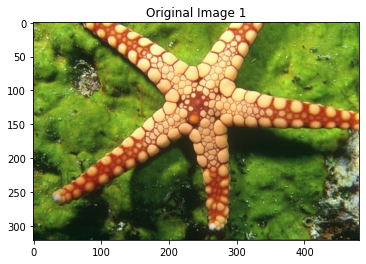

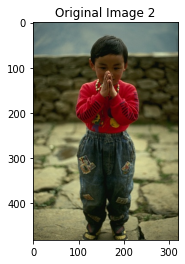

In [24]:
image1_default = Image.open("./Exercise_3_data/image1.jpg")
image2_default = Image.open("./Exercise_3_data/image2.jpg")
plt.imshow(image1_default)
plt.title("Original Image 1")
plt.show()
plt.imshow(image2_default)
plt.title("Original Image 2")
plt.show()

In [25]:
resized_image1 = asarray(image1_default.resize((int(image1_default.width * 0.15), int(image1_default.height * 0.15)), Image.ANTIALIAS), dtype=float)
ncut_image1 = ncut_graph_matrix(resized_image1)


In [26]:
resized_image2 = asarray(image2_default.resize((int(image2_default.width * 0.15), int(image2_default.height * 0.15)), Image.ANTIALIAS), dtype=float)
ncut_image2 = ncut_graph_matrix(resized_image2)

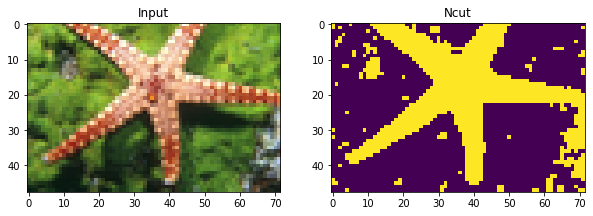

In [27]:
code, V = cluster(ncut_image1,2,2)
code.resize((resized_image1.shape[0],resized_image1.shape[1]))
fig, ax = plt.subplots(figsize=(10, 12), ncols=2)
ax[0].imshow(resized_image1)
ax[0].title.set_text("Input")
ax[1].imshow(code)
ax[1].title.set_text("Ncut")

plt.show()


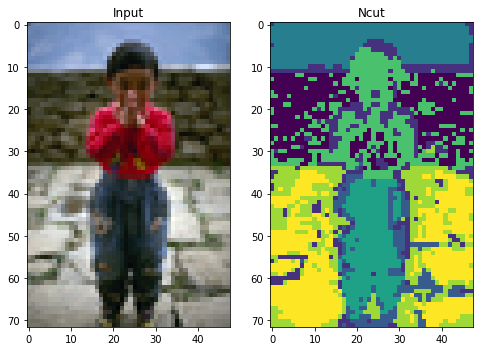

In [77]:
code, V = cluster(ncut_image2,8,4)
code.resize((resized_image2.shape[0],resized_image2.shape[1]))
fig, ax = plt.subplots(figsize=(8, 10), ncols=2)
ax[0].imshow(resized_image2)
ax[0].title.set_text("Input")
ax[1].imshow(code)
ax[1].title.set_text("Ncut")
plt.show()

#### 3.4  For each image, change the Normalized Cut Python by applying self-Diffuse to the similarity matrix W, then use W* to perform the normalized cut and output the image segmentation map. For each image, display 5 different normalized cut segmentation maps when varying the diffusion threshold from t = 1 to t = 2 × t* (similar to Fig 1 in [2] and Fig fig:4 below).

In [29]:
ncut_plus_selfdiffuse = selfDiffuse(ncut_image1, threshold=True)

t* =  671
-

1. step loading...
[■□□□□]not symmetric
336. step loading...
[■■□□□]not symmetric
671. step loading...
[■■■□□]not symmetric
1006. step loading...
[■■■■□]not symmetric
1342. step loading...
[■■■■■]not symmetric


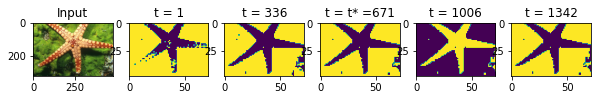

In [31]:
fig, ax = plt.subplots(ncols=6, figsize=(40, 40))
ax[0].imshow(image1_default)
ax[0].title.set_text("Input")
waiting_animation = ["[■□□□□]","[■■□□□]", "[■■■□□]", "[■■■■□]", "[■■■■■]"]
count=0
for key in ncut_plus_selfdiffuse:
    print(str(key)+'. step loading...')
    sys.stdout.write(str(count+1) + "\r" + waiting_animation[count % len(waiting_animation)])
    sys.stdout.flush()
    count += 1
    code, V = cluster(ncut_plus_selfdiffuse[key], 2, 2)
    code.resize((resized_image1.shape[0],resized_image1.shape[1]))
    ax[count].imshow(code)
    if count == 3:
        ax[count].title.set_text("t = t* = " + str(key))
      
    else: ax[count].title.set_text("t = " + str(key))
plt.show()

It can be seen from the result that as diffusion iteration increases, at some point, it reaches threshold which is *t** where we have perfect segmentation. 
However if it continues to iterate, the image will be over-diffuse. 

In [60]:
ncut_plus_selfdiffuse_2 = selfDiffuse(ncut_image2, threshold=True)

t* =  695
-

1. step loading...
[■□□□□]not symmetric
348. step loading...
[■■□□□]not symmetric
695. step loading...
[■■■□□]not symmetric
1042. step loading...
[■■■■□]not symmetric
1390. step loading...
[■■■■■]not symmetric


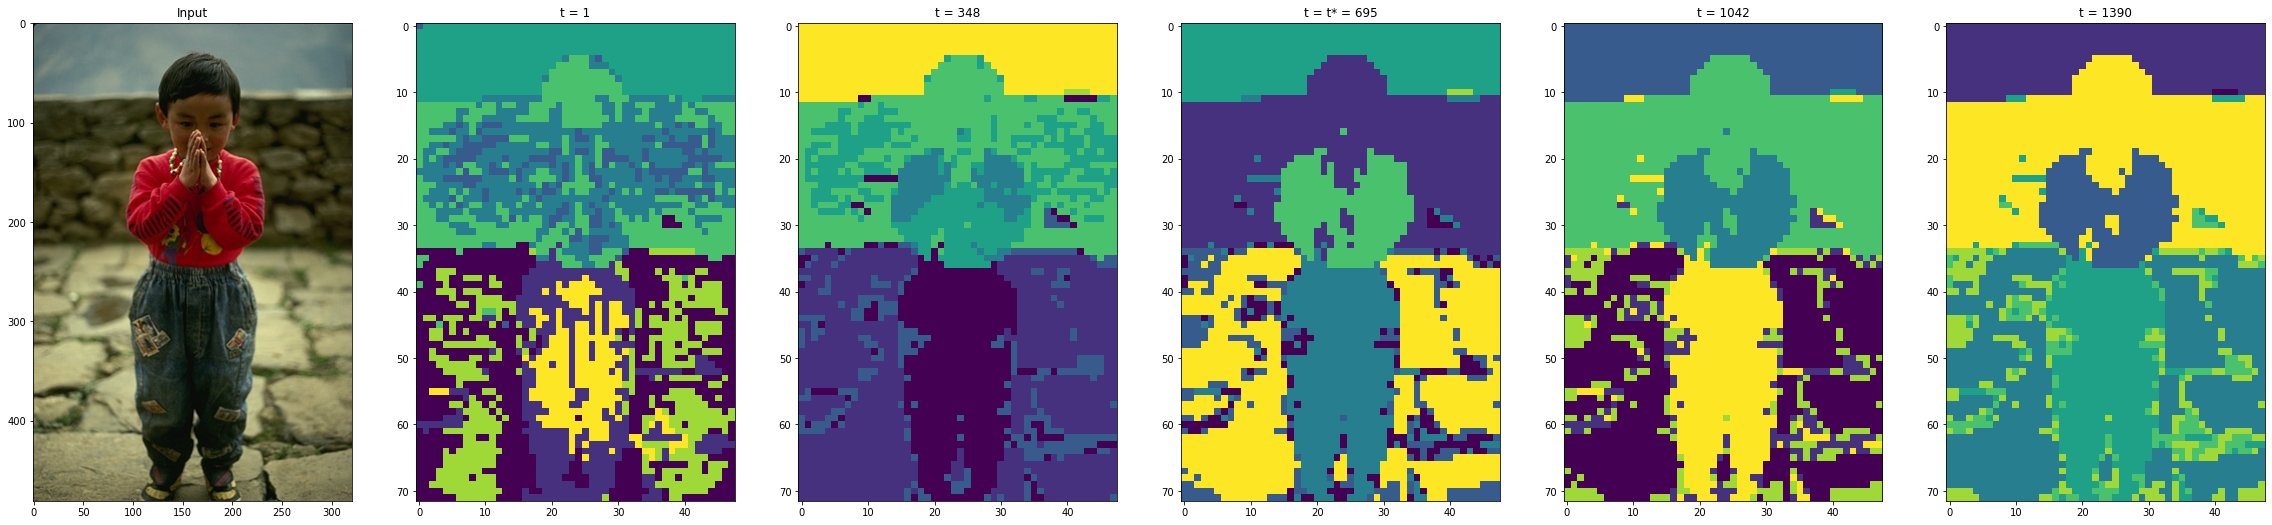

In [81]:
fig, ax = plt.subplots(ncols=6, figsize=(40, 40))
ax[0].imshow(image2_default)
ax[0].title.set_text("Input")
count=0
for key in ncut_plus_selfdiffuse_2:
    print(str(key)+'. step loading...')
    sys.stdout.write(str(count+1) + "\r" + animation[count % len(animation)])
    sys.stdout.flush()
    count += 1
    code, V = cluster(ncut_plus_selfdiffuse_2[key], 8, 4)
    code.resize((resized_image2.shape[0],resized_image2.shape[1]))
    ax[count].imshow(code)
    if count == 3:
        ax[count].title.set_text("t = t* = " + str(key))
      
    else: ax[count].title.set_text("t = " + str(key))
plt.show()